# Case - People

This notebook covers the data analysis case using Sample employee dataset that you can donload from Moodle. Keep in mind, that to read the data either put it in the same folder with your Jupyter Notebook or provide the full path (address) of hte file like I have done.

Almost no new function is provided in this notebook, but the combination of materials convered before is used to:
- analyse values in different columns (by printing unique values if they are not many or by plotting hteir distribution),
- convert objects into numeric using np.where or astype("category").cat.reorder_cateogires([]),cat.codes approach or pd.get_dummies(),
- calculate average satisfaction per salary group using pivot tables,
- calculat epercentage of employees who left the company (churn==1).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#important to know: reading files from different folders
data = pd.read_csv(r"C:\Users\ADstudent\Downloads\People.csv")
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data_num = data.select_dtypes(exclude=["object"])
data_obj = data.select_dtypes(include=["object"])

In [10]:
data_num.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
#print unique values for the first 2 columns
for i in range(0,2):
    print(data_obj.iloc[:,i].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [16]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
#for all columns, if unqieu values are less than 11, print them
for i in data.columns:
    unique_values = data[i].unique()
    num_unique = len(unique_values)
    if num_unique<11:
        print(i,unique_values)

number_project [2 5 7 6 4 3]
time_spend_company [ 3  6  4  5  2  8 10  7]
work_accident [0 1]
churn [1 0]
promotion_last_5years [0 1]
department ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary ['low' 'medium' 'high']


In [31]:
#not for exam, critically important for Business Analytics
data.salary = data.salary.astype("category").cat.reorder_categories(['low', 'medium', 'high']).cat.codes

In [32]:
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1


In [33]:
data.department.astype("category").cat.reorder_categories(['sales', 'accounting', 'hr', 'technical', 'support' ,'management', 'IT',
 'product_mng', 'marketing', 'RandD']).cat.codes

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       1
        ..
14969    0
14970    0
14971    0
14972    1
14973    1
14974    1
14975    2
14976    2
14977    2
14978    2
14979    3
14980    3
14981    3
14982    3
14983    3
14984    3
14985    3
14986    3
14987    3
14988    3
14989    3
14990    4
14991    4
14992    4
14993    4
14994    4
14995    4
14996    4
14997    4
14998    4
Length: 14999, dtype: int8

In [35]:
#not for exam, critically important for Business Analytics
departments = pd.get_dummies(data.department,prefix="department")

In [36]:
data = data.join(departments)

In [37]:
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0


In [38]:
#important: axis=1 indicates that we are dropping a column, not a row
data = data.drop("department",axis=1)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
work_accident             14999 non-null int64
churn                     14999 non-null int64
promotion_last_5years     14999 non-null int64
salary                    14999 non-null int8
department_IT             14999 non-null uint8
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null u

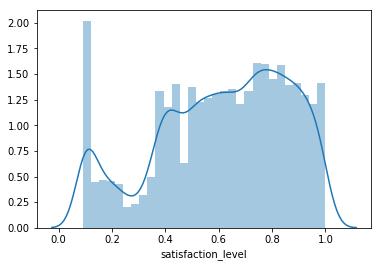

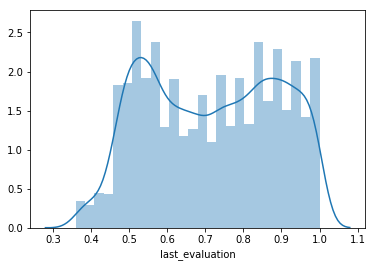

In [43]:
#plot the distribution of values for hte first 2 columns
for i in range(0,2):
    sns.distplot(data.iloc[:,i])
    plt.show()

In [44]:
#select several columns by providing them asa list
data.iloc[:,[1,2,5]]

,last_evaluation,number_project,work_accident
0,0.53,2,0
1,0.86,5,0
2,0.88,7,0
3,0.87,5,0
4,0.52,2,0
5,0.50,2,0
6,0.77,6,0
7,0.85,5,0
8,1.00,5,0
9,0.53,2,0


In [47]:
sat_level = pd.pivot_table(data,index="salary",values="satisfaction_level",aggfunc="mean")

In [64]:
sat_level

,satisfaction_level
salary,
0,0.600753
1,0.621817
2,0.637470


In [50]:
data.churn.value_counts()/len(data)*100

0    76.191746
1    23.808254
Name: churn, dtype: float64

In [51]:
#important but could also learn with data.info()
data.shape

(14999, 19)

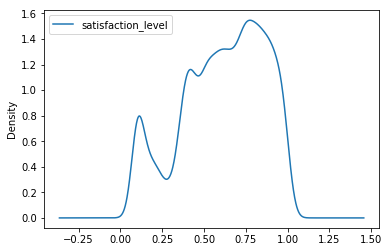

In [70]:
#plot the distribution without using seaborn
data.plot(y="satisfaction_level",kind="density")

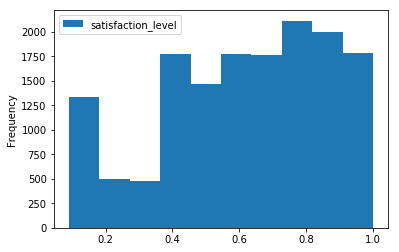

In [75]:
#plot the distribution without using seaborn
data.plot(y="satisfaction_level",kind="hist")

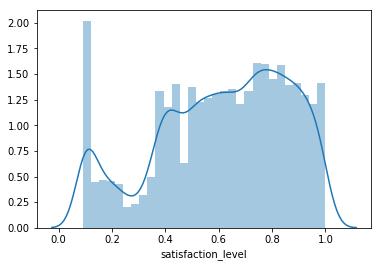

In [72]:
#plot the distribution using seaborn
sns.distplot(data.satisfaction_level)